In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'Expanded_data_with_more_features.csv')

NameError: name 'pd' is not defined

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [7]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [11]:
#drop the Unnamed: 0 column...
#df = df.drop('Unnamed: 0', axis=1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


[Text(0, 0, '15424'), Text(0, 0, '15217')]

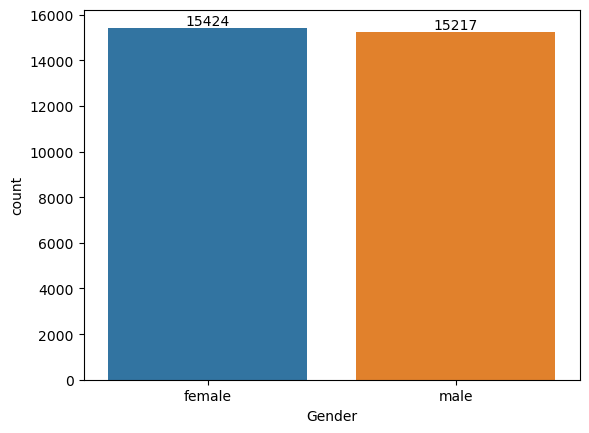

In [18]:
#Gender distribution 
ax = sns.countplot(x='Gender', data = df)

#data level
ax.bar_label(ax.containers[0])

<Axes: ylabel='ParentEduc'>

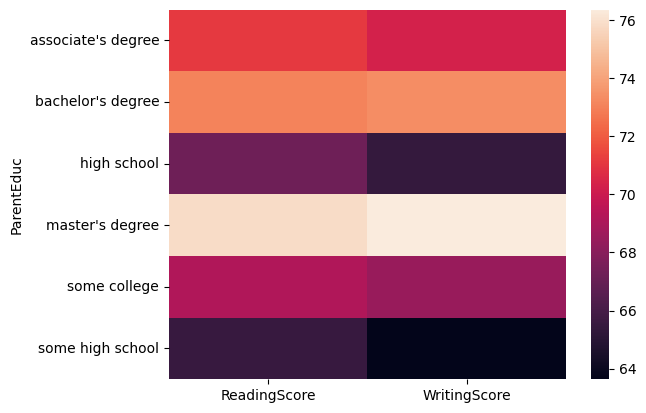

In [33]:
# influence of parents education on their scores
ax1 = df.groupby(['ParentEduc']).agg({'ReadingScore': 'mean', 'WritingScore':'mean'})
sns.heatmap(ax1)

<Axes: title={'center': 'The relation of parents marital status with their grade'}, ylabel='ParentMaritalStatus'>

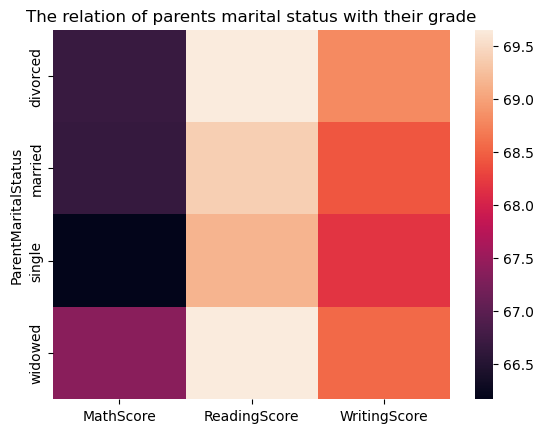

In [34]:
#ParentMaritalStatus impact with their score
ax2 = df.groupby(['ParentMaritalStatus']).agg({'MathScore': 'mean', 'ReadingScore': 'mean', 'WritingScore':'mean'})
#To show in heat map
plt.title('The relation of parents marital status with their grade')
sns.heatmap(ax2)

<Axes: xlabel='WritingScore'>

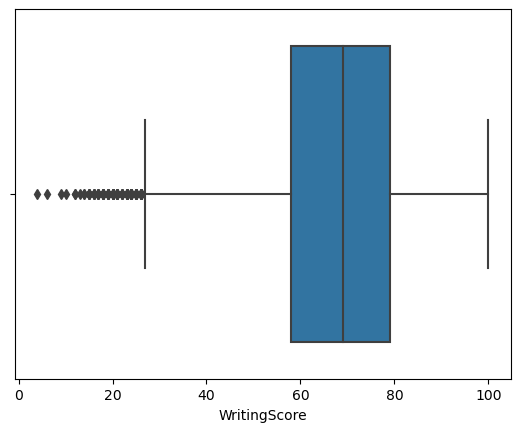

In [35]:
#range for mathscore
sns.boxplot(x= 'WritingScore', data = df)

In [36]:
#unique values in ethnic group
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x17cd67810>,
 [Text(1.0679343162184989, 0.26365943230411354, 'groupA'),
  Text(0.479656756487504, 0.989913832591447, 'groupB'),
  Text(-1.0208489310562472, 0.40971631644507106, 'groupC'),
  Text(-0.14172979830625182, -1.09083118046381, 'groupD'),
  Text(0.9948566425203025, -0.4693189329584214, 'groupE')],
 [Text(0.582509627028272, 0.14381423580224373, '7.70%'),
  Text(0.26163095808409303, 0.5399529995953347, '20.23%'),
  Text(-0.5568266896670439, 0.2234816271518569, '31.98%'),
  Text(-0.07730716271250097, -0.5949988257075327, '26.05%'),
  Text(0.5426490777383467, -0.255992145250048, '14.03%')])

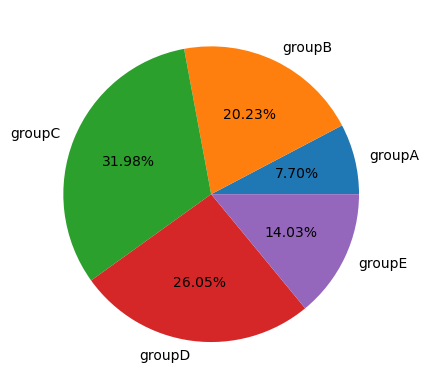

In [51]:
#Distribution of ethnic group
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()

l = ['groupA', 'groupB', 'groupC', 'groupD', 'groupE']
list =[groupA['EthnicGroup'], groupB['EthnicGroup'], groupC['EthnicGroup'], groupD['EthnicGroup'], groupE['EthnicGroup'],]
plt.pie(list, labels=l, autopct='%1.2f%%')

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

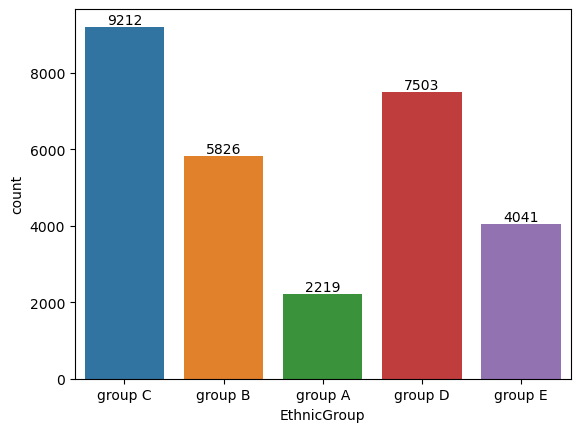

In [53]:
ax = sns.countplot(x ='EthnicGroup', data = df)
ax.bar_label(ax.containers[0])